# CHAPTER 10 - Introduction to Artificial Neural Networks with Keras

# From Biological to Artificial Neurons

## Biological Neurons

## Logical Computations with Neurons

## The Perceptron

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal length (cm)"]].values
y = (iris.target == 0)

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)
y_pred

array([ True,  True])

## The Multilayer Perceptron and Backpropagation

Let’s run through how backpropagation works again in a bit more detail:
- It handles one mini-batch at a time (for example, containing 32 instances each), and it goes through the full training set multiple times. Each pass is called an epoch.
- Each mini-batch enters the network through the input layer. The algorithm
then computes the output of all the neurons in the first hidden layer, for every
instance in the mini-batch. The result is passed on to the next layer, its output
is computed and passed to the next layer, and so on until we get the output of
the last layer, the output layer. This is the forward pass: it is exactly like making
predictions, except all intermediate results are preserved since they are needed
for the backward pass.
- Next, the algorithm measures the network’s output error (i.e., it uses a loss
function that compares the desired output and the actual output of the network,
and returns some measure of the error).
- Then it computes how much each output bias and each connection to the output
layer contributed to the error. This is done analytically by applying the chain rule
(perhaps the most fundamental rule in calculus), which makes this step fast and
precise.
- The algorithm then measures how much of these error contributions came from
each connection in the layer below, again using the chain rule, working backward
until it reaches the input layer. As explained earlier, this reverse pass efficiently
measures the error gradient across all the connection weights and biases in the
network by propagating the error gradient backward through the network (hence
the name of the algorithm).
- Finally, the algorithm performs a gradient descent step to tweak all the connec‐
tion weights in the network, using the error gradients it just computed.

It is important to initialize all the hidden layers’ connection weights
randomly, or else training will fail. For example, if you initialize all
weights and biases to zero, then all neurons in a given layer will
be perfectly identical, and thus backpropagation will affect them
in exactly the same way, so they will remain identical. In other
words, despite having hundreds of neurons per layer, your model
will act as if it had only one neuron per layer: it won’t be too
smart. If instead you randomly initialize the weights, you break
the symmetry and allow backpropagation to train a diverse team of
neurons.

## Regression MLPs

# Implementing MLPs with Keras

## Building an Image Classifier Using the Sequential API

In [2]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("GPUs:", tf.config.list_physical_devices("GPU"))
print("CPUs:", tf.config.list_physical_devices("CPU"))

2025-12-11 10:40:12.912192: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-11 10:40:12.946992: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-11 10:40:13.780317: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


TensorFlow version: 2.20.0
GPUs: []
CPUs: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


W0000 00:00:1765460414.288456   11406 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


### Using Keras to load the dataset

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data

fashion_mnist = load_data()

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [5]:
X_train.shape, X_train.dtype

((55000, 28, 28), dtype('uint8'))

In [6]:
X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.9, X_test / 255.0

In [7]:
X_train.dtype

dtype('float64')

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[0]]

'Ankle boot'

In [10]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [13]:
model.layers[1].name

'dense_3'

In [14]:
weights, biases = model.layers[3].get_weights()
weights

array([[ 0.2311661 ,  0.12281772, -0.21682158,  0.01597305,  0.09088284,
         0.22558942, -0.22167093,  0.18408898,  0.15902457,  0.1957528 ],
       [ 0.10366404, -0.1549555 ,  0.01354535,  0.03044334,  0.06057602,
         0.04493594, -0.1085816 ,  0.13607678,  0.12085015, -0.05154893],
       [-0.11690392, -0.07453549, -0.02720729,  0.13261214, -0.03521065,
         0.20043659,  0.13959199,  0.20490116,  0.01710469,  0.13572669],
       [-0.02247655, -0.1274021 , -0.09747292, -0.01164144, -0.06695302,
        -0.05702955, -0.16369238, -0.23299275, -0.04502255,  0.0196436 ],
       [ 0.20968357,  0.16504887, -0.17133303,  0.07173961, -0.18556271,
        -0.20218892,  0.19685775,  0.16432598,  0.05729705, -0.1257276 ],
       [ 0.0524506 ,  0.1826142 , -0.0209381 , -0.14650644,  0.19372112,
        -0.215199  ,  0.15499336, -0.13983066,  0.16062388, -0.22659303],
       [-0.19395319, -0.05305682, -0.09324484,  0.10608879,  0.14909562,
        -0.08812459, -0.20279513, -0.02886625

### Compiling the model

In [15]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

### Training and evaluating the model

In [16]:
    history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7598 - loss: 0.7251 - val_accuracy: 0.8230 - val_loss: 0.5146
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8300 - loss: 0.4908 - val_accuracy: 0.8376 - val_loss: 0.4612
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8448 - loss: 0.4448 - val_accuracy: 0.8434 - val_loss: 0.4393
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8547 - loss: 0.4174 - val_accuracy: 0.8460 - val_loss: 0.4256
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8613 - loss: 0.3973 - val_accuracy: 0.8496 - val_loss: 0.4147
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8663 - loss: 0.3812 - val_accuracy: 0.8538 - val_loss: 0.4056
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8712 - loss: 0.3674 - val_accuracy: 0.8554 - val_loss: 0.3973
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8753 - loss: 0.3554 - 

In [17]:
len(history.history['accuracy'])

30

<Axes: xlabel='Epoch'>

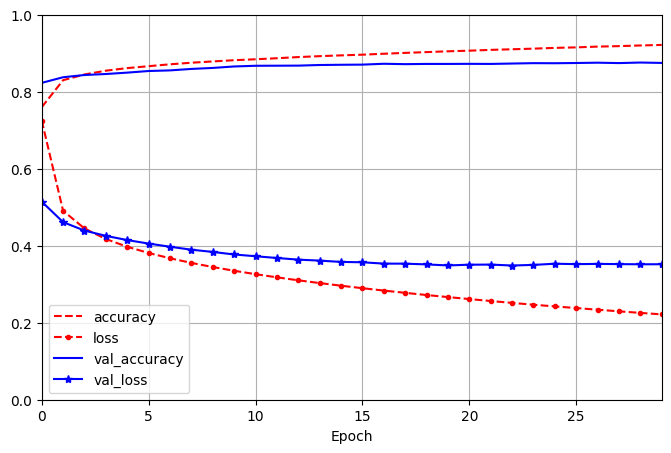

In [18]:
import matplotlib.pylab as plt
import pandas as pd

history_df = pd.DataFrame(history.history)
history_df.plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"]
)

In [19]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.8728 - loss: 0.3672


[0.3671781122684479, 0.8727999925613403]

### Using the model to make predictions

In [20]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.17, 0.  , 0.01, 0.  , 0.82],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [21]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [22]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

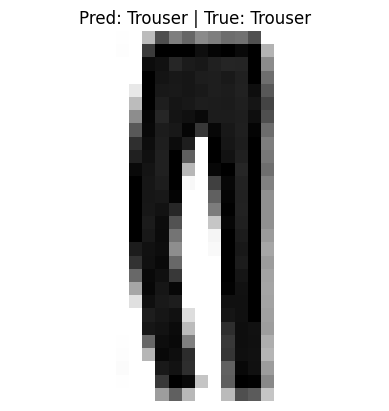

In [23]:
y_new = y_test[:3]
idx = 2
plt.imshow(X_new[idx], cmap="gray_r")
plt.title(f"Pred: {class_names[y_pred[idx]]} | True: {class_names[y_test[idx]]}")
plt.axis("off")
plt.show()

In [24]:
model.save("../models/mnist.keras")

## Building a Regression MLP Using the Sequential API

In [25]:
tf.random.set_seed(42)
# norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

## Building Complex Models Using the Functional API

In [26]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

## Using the Subclassing API to Build Dynamic Models

## Using Callbacks

## Using TensorBoard for Visualization

In [27]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs

# Fine-Tuning Neural Network Hyperparameters

In [28]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

In [29]:
random_search_turner = kt.RandomSearch(build_model, objective="val_accuracy", max_trials=5, overwrite=True, directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)
random_search_turner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 16s]
val_accuracy: 0.7806000113487244

Best val_accuracy So Far: 0.8497999906539917
Total elapsed time: 00h 01m 22s


In [30]:
top3_models = random_search_turner.get_best_models(num_models=3)
best_model = top3_models[0]
best_model

/home/diego/projetos/python/ml/.venv/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


<Sequential name=sequential, built=True>

In [31]:
top3_params = random_search_turner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 4,
 'n_neurons': 74,
 'learning_rate': 0.00905127409782462,
 'optimizer': 'adam'}

In [32]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)

    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)

